In [ ]:
# @title Step 1. Install essentials
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

In [ ]:
 # @title Step 2. Initialize Diffusers
import torch
from diffusers import StableDiffusionPipeline

class generate:
   def __init__(self,description,epochs):
       self.pipe = StableDiffusionPipeline.from_pretrained("redstonehero/cetusmix_v4", torch_dtype=torch.float16)
       self.pipe = self.pipe.to("cuda")
       self.pipe.safety_checker = None
       self.description = description
       self.h = 600
       self.w = 1020
       self.steps = epochs
       self.guidance = 8.5
       self.neg = "easynegative, human, lowres, bad anatomy, bad hands anatomy, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality,bad face, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"

   def print(self):
       self.image = self.pipe(self.description, height=self.h, weight=self.w, num_inference_steps=self.steps, guidance_scale=self.guidance, negative_prompt=self.neg).images[0]

   @classmethod
   def newTask(cls,text,epochs):
       return cls(text,epochs)

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

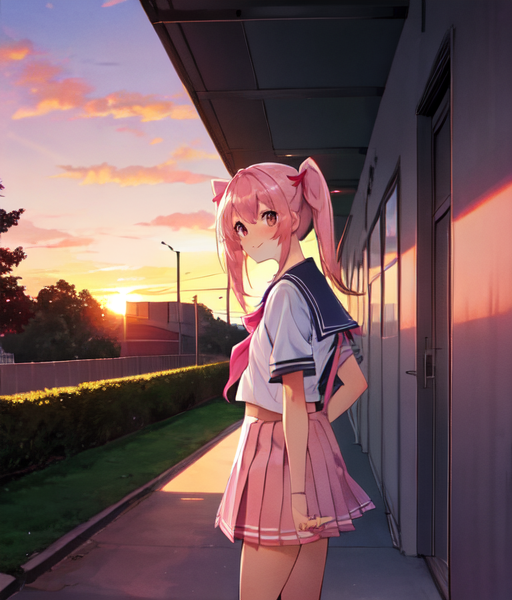

In [46]:
 # @title Step 3. Generate Image (For output look below)
Gender = "Female" # @param ["Female", "Male", "Loli"] {allow-input: true}
Hair_Style = "ligh pink pigtail hair"# @param {type:"string"}
Cloths = "white School Uniform"# @param {type:"string"}["Dress", "School Uniform", "Casual Clothes"] {allow-input: true}
Face_Expression = "Smug"# @param {type:"string"}["Flustered", "Smug", "Happy"] {allow-input: true}
Background = "School Corridor"# @param {type:"string"}["School", "Classroom", "School Corridor"] {allow-input: true}
Other_Features = "sunset"# @param {type:"string"}

list_widgets = (Gender,Hair_Style,Cloths,Face_Expression,Background,Other_Features)
text = list(map(lambda data: data,list_widgets))
prompt = str(", ".join(text))
Generate = generate.newTask(prompt,100)
generate.print(Generate)
Generate.image